In [3]:
import glob
import numpy as np
import os
import pandas as pd
import pickle
import prefect
import subprocess
import tempfile
import wolf

Error configuring prefect logger


In [4]:
# for Hapaseg itself
hapaseg = wolf.ImportTask(
  task_path = "../", # TODO: make remote
  task_name = "hapaseg"
)

In [5]:
# localize reference files to RODISK
localization_task = wolf.LocalizeToDisk(
  files = dict(
    ref_fasta = "gs://getzlab-workflows-reference_files-oa/hg19/Homo_sapiens_assembly19.fasta",
    ref_fasta_idx = "gs://getzlab-workflows-reference_files-oa/hg19/Homo_sapiens_assembly19.fasta.fai",
    ref_fasta_dict = "gs://getzlab-workflows-reference_files-oa/hg19/Homo_sapiens_assembly19.dict",
    coverage_csv='/home/opriebe/dev/HapASeg/exome/6_C1D1_META.cov',
    allelic_clusters_object='/home/opriebe/dev/HapASeg/exome/6_C1D1_META.DP_clusts.auto_ref_correct.overdispersion92.no_phase_correct.npz',
    SNPs_pickle='/home/opriebe/dev/HapASeg/exome/6_C1D1_META.SNPs.pickle',
    covariate_dir='/home/opriebe/dev/HapASeg/covars',
    cytoband_file='gs://getzlab-workflows-reference_files-oa/hg19/cytoBand.txt'
  )
)

In [6]:
loc_res = localization_task.run()

[2022-02-22 20:30:28+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (67 GB remaining)
[2022-02-22 20:30:28+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 20:30:28+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 20:30:40+0000] INFO - prefect | Hashing file /home/opriebe/dev/HapASeg/covars/GSE137764_H1.hg19_raw_liftover.pickle (0 MiB)
[2022-02-22 20:30:40+0000] INFO - prefect | Hashing file /home/opriebe/dev/HapASeg/covars/GC.pickle (0 MiB)
[2022-02-22 20:30:40+0000] INFO - prefect | Hashing file /home/opriebe/dev/HapASeg/covars/GSE137764_H1_GaussiansGSE137764_mooth_scaled_autosome.mat (0 MiB)
[2022-02-22 20:30:40+0000] INFO - prefect | Hashing file /home/opriebe/dev/HapASeg/covars/GSE137764_H1.hg38.pickle (0 MiB)
[2022-02-22 20:30:40+0000] INFO - prefect | Hashing file /home/opriebe/dev/HapASeg/covars/GSE137764_H1.hg19_liftover.pickle (0 MiB)
[2022-02-22 20:30:44+0000] WARNING - prefect | Job avoidanc

Listed 0 items.


[2022-02-22 20:33:23+0000] INFO - prefect | Finished with status COMPLETED


In [7]:
loc_res

{'SNPs_pickle': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/SNPs_pickle/6_C1D1_META.SNPs.pickle',
 'allelic_clusters_object': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/allelic_clusters_object/6_C1D1_META.DP_clusts.auto_ref_correct.overdispersion92.no_phase_correct.npz',
 'covariate_dir': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/covariate_dir/covars',
 'coverage_csv': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/coverage_csv/6_C1D1_META.cov',
 'cytoband_file': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/cytoband_file/cytoBand.txt',
 'ref_fasta': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/ref_fasta/Homo_sapiens_assembly19.fasta',
 'ref_fasta_dict': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/ref_fasta_dict/Homo_sapiens_assembly19.dict',
 'ref_fasta_idx': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/ref_fasta_idx/Homo_sapiens_assembly19.fasta.fai'}

In [9]:
prep_cov_mcmc_task = hapaseg.Hapaseg_prepare_coverage_mcmc(
    inputs={
        "coverage_csv":loc_res["coverage_csv"],
        "allelic_clusters_object":loc_res["allelic_clusters_object"],
        "SNPs_pickle":loc_res["SNPs_pickle"],
        "covariate_dir":loc_res["covariate_dir"],
        "allelic_sample":-1,
        "ref_file_path":loc_res["ref_fasta"]
    }
)

In [10]:
prep_cov_mcmc_res = prep_cov_mcmc_task.run()

[2022-02-22 20:35:16+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (67 GB remaining)
[2022-02-22 20:35:16+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 20:35:16+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 20:35:17+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_prepare_coverage_mcmc__2022-02-22--20-35-17_leiwweq_gu0qihq_qmaenxaofb5kc/jobs/0'
[2022-02-22 20:35:17+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 20:35:17+0000] INFO - prefect | Localizing inputs...
[2022-02-22 20:35:17+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_prepare_coverage_mcmc__2022-02-22--20-35-17_leiwweq_gu0qihq_qmaenxaofb5kc
[2022-02-22 20:35:17+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 20:37:49+0000] INFO - prefect | Finished with status COMPL

In [11]:
prep_cov_mcmc_res["preprocess_data"]

'/mnt/nfs/workspace/Hapaseg_prepare_coverage_mcmc__2022-02-22--18-25-49_leiwweq_gu0qihq_vaetv3zjnipra/outputs/0/preprocess_data/preprocess_data.npz'

In [12]:
np.load(prep_cov_mcmc_res["preprocess_data"])["Pi"].shape[1]

18

In [13]:
np.load(prep_cov_mcmc_res["preprocess_data"])["adp_cluster"]

array(-1)

In [8]:
cluster_idxs = [i for i in np.arange(np.load(prep_cov_mcmc_res["preprocess_data"])["Pi"].shape[1])]

In [9]:
cluster_idxs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [10]:
cov_mcmc_scatter_task = hapaseg.Hapaseg_coverage_mcmc(
    inputs={
        "preprocess_data":prep_cov_mcmc_res["preprocess_data"],
        "num_draws":10,
        "cluster_num":cluster_idxs
    }
)

In [14]:
cov_mcmc_scatter_res = cov_mcmc_scatter_task.run()

[2022-02-22 18:33:56+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (68 GB remaining)
[2022-02-22 18:33:56+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 18:33:56+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 18:33:57+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_coverage_mcmc__2022-02-22--18-33-57_ug3blqi_gu0qihq_0ywmku3e5jt4g/jobs/0'
[2022-02-22 18:33:57+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 18:33:57+0000] INFO - prefect | Localizing inputs...
[2022-02-22 18:33:57+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_coverage_mcmc__2022-02-22--18-33-57_ug3blqi_gu0qihq_0ywmku3e5jt4g
[2022-02-22 18:33:57+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 18:45:04+0000] INFO - prefect | Finished with statuses COMPLETED: 18


In [15]:
cov_mcmc_gather_task = hapaseg.Hapaseg_collect_coverage_mcmc(
    inputs={
        "cov_mcmc_files":[cov_mcmc_scatter_res["cov_segmentation_data"]],
        "cov_df_pickle":prep_cov_mcmc_res["cov_df_pickle"]
    }
)

In [16]:
cov_mcmc_gather_res = cov_mcmc_gather_task.run()

[2022-02-22 18:45:04+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (68 GB remaining)
[2022-02-22 18:45:04+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 18:45:04+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 18:45:05+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_collect_coverage_mcmc__2022-02-22--18-45-05_fueiipq_gu0qihq_suf5z2rqs5c02/jobs/0'
[2022-02-22 18:45:05+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 18:45:05+0000] INFO - prefect | Localizing inputs...
[2022-02-22 18:45:05+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_collect_coverage_mcmc__2022-02-22--18-45-05_fueiipq_gu0qihq_suf5z2rqs5c02
[2022-02-22 18:45:05+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 18:45:35+0000] INFO - prefect | Finished with status COMPL

In [17]:
cov_mcmc_gather_res["cov_collected_data"],

('/mnt/nfs/workspace/Hapaseg_collect_coverage_mcmc__2022-02-22--18-45-05_fueiipq_gu0qihq_suf5z2rqs5c02/outputs/0/cov_collected_data/cov_mcmc_collected_data.npz',)

In [18]:
prep_cov_mcmc_res["cov_df_pickle"]

'/mnt/nfs/workspace/Hapaseg_prepare_coverage_mcmc__2022-02-22--18-25-49_leiwweq_gu0qihq_vaetv3zjnipra/outputs/0/cov_df_pickle/cov_df.pickle'

In [19]:
cov_dp_task = hapaseg.Hapaseg_coverage_dp(
    inputs={
        "f_cov_df":prep_cov_mcmc_res["cov_df_pickle"],
        "cov_mcmc_data": cov_mcmc_gather_res["cov_collected_data"],
        "num_segmentation_samples":10,
        "num_draws":10
    }
)

In [20]:
cov_dp_res = cov_dp_task.run()

[2022-02-22 18:46:16+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (68 GB remaining)
[2022-02-22 18:46:16+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 18:46:16+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 18:46:17+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_coverage_dp__2022-02-22--18-46-17_vr5yroi_gu0qihq_jnen1j5wwc0jw/jobs/0'
[2022-02-22 18:46:17+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 18:46:17+0000] INFO - prefect | Localizing inputs...
[2022-02-22 18:46:17+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_coverage_dp__2022-02-22--18-46-17_vr5yroi_gu0qihq_jnen1j5wwc0jw
[2022-02-22 18:46:17+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 19:34:40+0000] INFO - prefect | Finished with status COMPLETED


In [24]:
cov_dp_res['cov_dp_object']

'/mnt/nfs/workspace/Hapaseg_coverage_dp__2022-02-21--19-20-12_vr5yroi_0z03eha_3jsg0ejxgek5k/outputs/0/cov_dp_object/Cov_DP_model.pickle'

In [21]:
adp_draw_num = int(np.load(prep_cov_mcmc_res["preprocess_data"])["adp_cluster"])
gen_acdp_task = hapaseg.Hapaseg_acdp_generate_df(
    inputs = {
        "SNPs_pickle":loc_res["SNPs_pickle"],
        "allelic_clusters_object":loc_res["allelic_clusters_object"],
        "coverage_dp_object":cov_dp_res["cov_dp_object"],
        "allelic_draw_index":adp_draw_num,
        "ref_file_path":loc_res["ref_fasta"]
    }
)

In [22]:
gen_acdp_results = gen_acdp_task.run()

[2022-02-22 19:38:45+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (68 GB remaining)
[2022-02-22 19:38:45+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 19:38:45+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 19:38:46+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_acdp_generate_df__2022-02-22--19-38-46_b3hxleq_gu0qihq_gclmix5vysgvm/jobs/0'
[2022-02-22 19:38:46+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 19:38:46+0000] INFO - prefect | Localizing inputs...
[2022-02-22 19:38:46+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_acdp_generate_df__2022-02-22--19-38-46_b3hxleq_gu0qihq_gclmix5vysgvm
[2022-02-22 19:38:46+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 19:44:18+0000] INFO - prefect | Finished with status COMPLETED


In [8]:
acdp_task = hapaseg.Hapaseg_run_acdp(
    inputs = {
        "coverage_dp_object":cov_dp_res["cov_dp_object"],
        "acdp_df":gen_acdp_results["acdp_df_pickle"],
        "num_samples":10,
        "cytoband_df": loc_res["cytoband_file"]
    }
)

NameError: name 'cov_dp_res' is not defined

In [13]:
acdp_task = hapaseg.Hapaseg_run_acdp(
    inputs = {
        "coverage_dp_object":'/mnt/nfs/workspace/Hapaseg_coverage_dp__2022-02-22--18-46-17_vr5yroi_gu0qihq_jnen1j5wwc0jw/outputs/0/cov_dp_object/Cov_DP_model.pickle',
        "acdp_df":'/mnt/nfs/workspace/Hapaseg_acdp_generate_df__2022-02-22--19-38-46_b3hxleq_gu0qihq_gclmix5vysgvm/outputs/0/acdp_df_pickle/acdp_df.pickle',
        "num_samples":10,
        "cytoband_file": 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/cytoband_file/cytoBand.txt'
    }
)

In [14]:
acdp_task.run()

[2022-02-22 20:44:03+0000] WARNING - prefect | Available disk storage at /mnt/nfs is small (67 GB remaining)
[2022-02-22 20:44:03+0000] INFO - prefect | Starting Slurm controller ...
[2022-02-22 20:44:03+0000] INFO - prefect | Waiting up to 60 seconds for Slurm controller to start ...
[2022-02-22 20:44:04+0000] WARNING - prefect | Cannot recover preexisting task outputs: [Errno 2] No such file or directory: '/mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq/jobs/0'
[2022-02-22 20:44:04+0000] WARNING - prefect | Overwriting output and aborting job avoidance.
[2022-02-22 20:44:04+0000] INFO - prefect | Localizing inputs...
[2022-02-22 20:44:04+0000] INFO - prefect | Job staged on SLURM controller in: /mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq
[2022-02-22 20:44:04+0000] INFO - prefect | Preparing pipeline script
[2022-02-22 20:49:07+0000] INFO - prefect | Finished with status COMPLETED


<WolfTaskResults: State: COMPLETED
                  Inputs: {'acdp_df': '/mnt/nfs/workspace/Hapaseg_acdp_generate_df__2022-02-22--19-38-46_b3hxleq_gu0qihq_gclmix5vysgvm/outputs/0/acdp_df_pickle/acdp_df.pickle', 'coverage_dp_object': '/mnt/nfs/workspace/Hapaseg_coverage_dp__2022-02-22--18-46-17_vr5yroi_gu0qihq_jnen1j5wwc0jw/outputs/0/cov_dp_object/Cov_DP_model.pickle', 'cytoband_file': 'rodisk://canine-a8871bb61a48cc8aa0b466808d59e309/cytoband_file/cytoBand.txt', 'num_samples': '10'}
                  Outputs: {acdp_model_pickle, stdout, stderr}>

In [25]:
2082/60

34.7

In [31]:
loc_res["allelic_segs"]

'rodisk://canine-fc0121b350f84fddd9c8a748234c7eda/allelic_segs/allelic_segs_hg19.pickle'

In [15]:
"/mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq/jobs/0/workspace/acdp_clusters_plot.png"

'/mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq/jobs/0/workspace/acdp_clusters_plot.png'

<img src="/mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq/jobs/0/workspace/acdp_clusters_plot.png" />

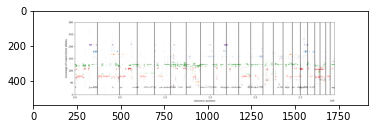

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/mnt/nfs/workspace/Hapaseg_run_acdp__2022-02-22--20-44-04_2obbi3a_gu0qihq_bgwybrorrvnuq/jobs/0/workspace/acdp_genome_plot.png")
imgplot = plt.imshow(img)
plt.show()

In [34]:
pd.read_pickle('../cptest.pickle')

,chr,start,end
0,1,0,121500000
1,1,128900000,249250621
2,2,0,90500000
3,2,96800000,243199373
4,3,0,87900000
5,3,93900000,198022430
6,4,0,48200000
7,4,52700000,191154276
8,5,0,46100000
9,5,50700000,180915260
